In [121]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import random

#### 1)

In [122]:
a = 1
b = 4

In [123]:
np.random.seed(1234)
count = 0
s = []
while count < 100:
    #Selecting a value along each rod
    y1 = random.uniform(0,b)
    y2 = random.uniform(0,b)
    #Finding distance between points
    si = np.sqrt(a ** 2 + (y2-y1) ** 2)
    s.append(si)
    count += 1

#### 2)

In [124]:
#Bin width
w = 0.1
s_pdf = []
#Creating a range of s values for the theoretical pdf plot
s_prime = a + w/2
s_pdf.append(s_prime)
for i in range(125):
    s_prime += w/5
    s_pdf.append(s_prime)

In [125]:
#Function for the given pdf
def f(s,a,b):
    term1 = 2 * s / b**2
    term2 = (b / np.sqrt(s**2 - a**2)) - 1
    return term1 * term2

In [126]:
#Applying the s range to the function
s_pdf = np.array(s_pdf)
f_pdf = f(s_pdf,a,b)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


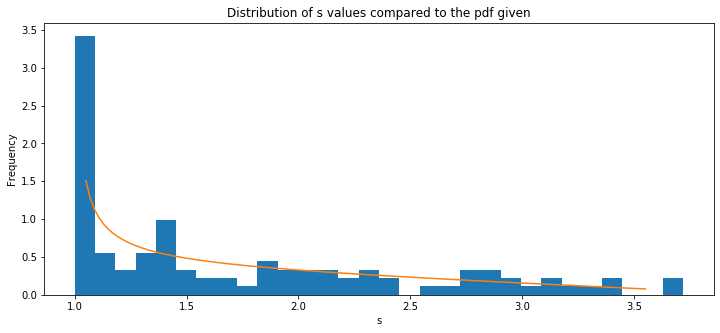

In [127]:
plt.figure(figsize = (12,5))
plt.title("Distribution of s values compared to the pdf given")
plt.hist(s,bins = 30,normed = True)
plt.plot(s_pdf,f_pdf)
plt.xlabel("s")
plt.ylabel("Frequency")
plt.show()

#### 3)

In [128]:
def negLogLikelihood(b_val):
    sum = 0.
    #Negatively adding the log of each function value for all s data
    for x in s:
        sum -= np.log(f(x,a,b_val))
    return sum

#### 4)

In [129]:
#Finding the minimum b value
s_max = np.amax(s)
b_min = np.sqrt(s_max ** 2 - a ** 2)
b_min

3.5823509349206697

In [130]:
#Finding the negative log function values over a range
b_range = np.linspace(b_min + w/10, b_min  + 1, 1000)
s_log = []
for i in b_range:
    s_log.append(negLogLikelihood(i))

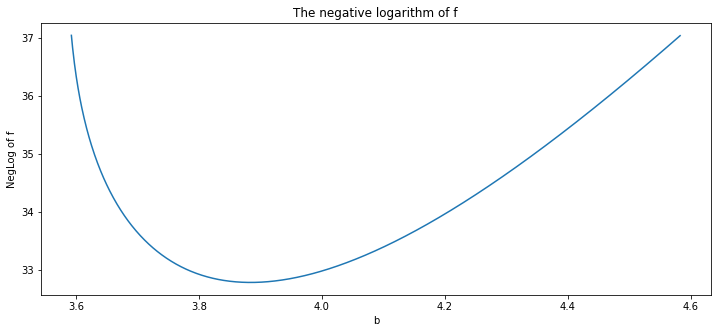

In [131]:
plt.figure(figsize = (12,5))
plt.title("The negative logarithm of f")
plt.plot(b_range,s_log)
plt.xlabel("b")
plt.ylabel("NegLog of f")
plt.show()

#### 5)

In [132]:
from scipy import optimize
from scipy import misc

In [133]:
# find the value for b that minimizes the negative log likelihood function:
result = optimize.minimize_scalar(negLogLikelihood,bounds =(b_min,b_min+1), method = 'bounded')
b_hat = result.x

# find the second derivative of the negative log likelihood function at the point of maximum likelihood
result2 = misc.derivative(negLogLikelihood,b_hat,dx=0.1,n=2)

sig_b = 1/np.sqrt(result2)

print("The maximum likelihood estimate for b is {0:5.3f} +/- {1:5.3f}".format(b_hat,sig_b))

The maximum likelihood estimate for b is 3.884 +/- 0.168


#### 6)

The two derivatives below were found using analytic methods

$\frac{d(ln(f))}{db} = \frac{-2}{b} + \frac{1}{(b-\sqrt{s^2-a^2})}$  

$\frac{d^2(ln(f))}{db^2} = \frac{2}{b^2} - \frac{1}{(b-\sqrt{s^2-a^2})^2}$

In [134]:
#This will apply each s value to the second derivative and sum the results to find std.
sum = 0.
for y in s:
    #Formula for the second derivative
    sum += (2 * b_hat ** -2) - ((b_hat-np.sqrt(y**2-a**2)) ** -2)
#Finding the std. 
b_sig2 = 1/np.sqrt(-sum)
print("The standard deviation of the estimator is", b_sig2)

The standard deviation of the estimator is 0.17040551853253696


It is observed that the standard deviations found in 5) and 6) were fairly similar, with the values starting to deviate slightly after the first decimal place was reached.

#### 7)

In [135]:
#Creating the neg. loglikelihood function summing over a different array
def negLogLikelihood7(b_val):
    sum = 0.
    for x in s7:
        sum -= np.log(f(x,a,b_val))
    return sum

In [136]:
b7 = []
#Applying the methods above 1000 times
for i in range(1000):
    count7 = 0
    s7 = []
    while count7 < 100:
        y1 = random.uniform(0,b)
        y2 = random.uniform(0,b)
        si = np.sqrt(a ** 2 + (y2-y1) ** 2)
        s7.append(si)
        count7 += 1
    #if statement to ignore the last case
    if count7 >= 100:
        #Updating b_min
        s_max = np.amax(s7)
        b_min = np.sqrt(s_max ** 2 - a ** 2)
    #Finding the b value
    result = optimize.minimize_scalar(negLogLikelihood7,bounds =(b_min,b_min+1), method = 'bounded')
    b_hat = result.x
    b7.append(b_hat)

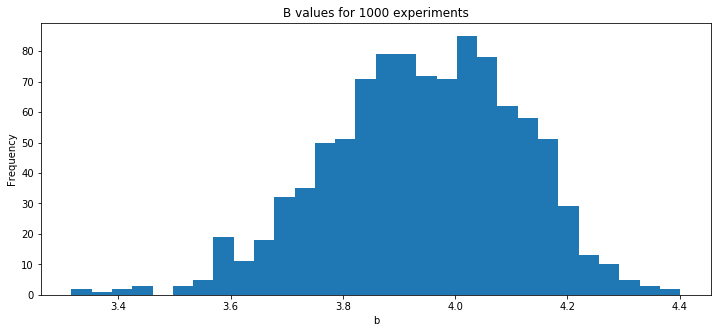

In [137]:
plt.figure(figsize = (12,5))
plt.hist(b7, bins = 30)
plt.xlabel("b")
plt.ylabel("Frequency")
plt.title("B values for 1000 experiments")
plt.show()

In [138]:
print("The mean of the b values through repeated experiments is", np.mean(b7))
print("The standard deviation of the b values through repeated experiments is", np.std(b7))

The mean of the b values through repeated experiments is 3.9429658755385746
The standard deviation of the b values through repeated experiments is 0.17074229308007646


The b estimation found from 5) was slightly off from the value found through repeated experiments; the values were close to eachother in value but deviated more in the decimal places than what was found in the standard deviations.

The values found for the standard deviations were found to all be approximately equal to one another, with the values found in 6) and 7) being the closest to eachother in value, and the results found in 5) and 7) being the furthest away from eachother in value. 

Since the definition of unbias states that $<\hat\theta> = \theta$, but due to the deviation found in the values of b, this system must be bias. 